# Calculate X-ray electric field intensity throughout thin film for various incident angles
Many simplifying assumptions, adapted from MatLab GIWAXS-SIIRKit

## Notebook setup

### Imports

In [1]:
import pathlib
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from tqdm.auto import tqdm
import xraydb

# Add the script directory to the system path
script_dir = '/Users/andrew/local_data_analysis/repos/xraytools/'
sys.path.append(script_dir)
import xraytools

### Define paths

In [2]:
notebookPath = pathlib.Path.cwd()
notebookPath

PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/giwaxs_suite/local_notebooks/xefi')

### Define functions

In [3]:
# def gaussian(x, mean, stddev):
#     return np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
    
# # Beam divergence Gaussian profile
# beamdiverge = np.deg2rad(beamdiverge)
# G = beamdiverge / (2 * np.sqrt(2 * np.log(2)))
# lineshape = gaussian(np.arange(-5 * G, 5 * G, stepsize), 0, G)
# lineshape /= np.sum(lineshape)  # Normalize
# intens = np.convolve(intens, lineshape, mode='same')

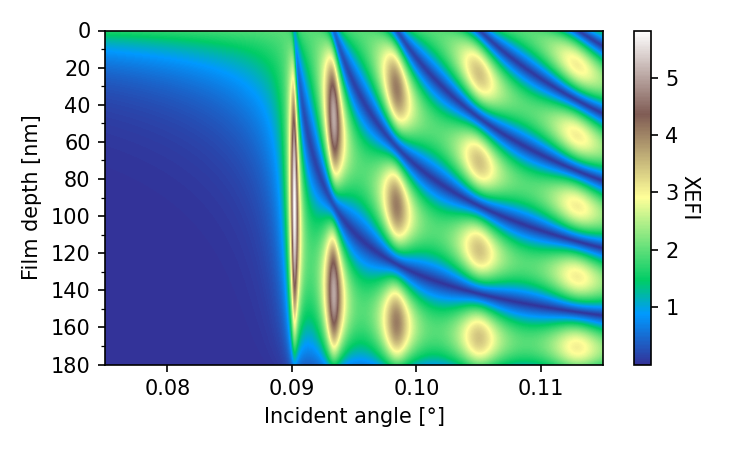

In [149]:
%matplotlib widget
# Example cell calculating and plotting XEFI for a PM6 film on Si:


plt.close('all')
energy = 13500  # eV of GIWAXS data
film_stoichiometry = 'C68H76F2O2S8'  # PM6 stoichiometry
sub_stoichiometry = 'Si'  # on silicon substrate
film_density = 1  # ~ density of PM6
sub_density = 2.33  # density of Si
sampthick = 180  # set film thickness
aoi = 0.095  # center of aoi range
aoi_extent = 0.02  # extent ± of aoi range

angles, z, EE = xraytools.calc_xefi(energy, 
                                    film_stoichiometry, 
                                    film_density, 
                                    sub_stoichiometry, 
                                    sub_density,
                                    sampthick, 
                                    aoi,
                                    aoi_extent)


# Plot check 
EE_mag = np.abs(EE)
cmin = np.quantile(EE_mag, 0.05)
cmax = np.quantile(EE_mag, 1)

fig, ax = plt.subplots(figsize=(5,3), dpi=150, tight_layout=True)

im = ax.imshow(
    EE_mag, 
    origin='upper', 
    extent=[angles[0],angles[-1],z[-1],z[0]], 
    aspect='auto',
    norm=plt.Normalize(cmin,cmax),
    cmap=plt.cm.terrain
)
ax.set(xlabel='Incident angle [°]', ylabel= 'Film depth [nm]')
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(20))

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('XEFI', rotation=270, labelpad=10)

plt.show()

In [156]:
1/3

0.3333333333333333

In [166]:
np.rad2deg(np.arccos(np.sqrt(1/2)))

np.float64(45.0)

In [167]:
np.cos(np.deg2rad(45))**2

np.float64(0.5000000000000001)

In [164]:
np.cos(np.deg2rad(54.7))**2

np.float64(0.33391943405814845)

In [129]:
import xarray as xr

In [130]:
G

np.float64(5.929384729596663e-05)

In [142]:
EE_DA.depth

<xarray.DataArray 'depth' (depth: 1000)> Size: 8kB
array([  0.     ,   0.18018,   0.36036, ..., 179.63964, 179.81982, 180.     ])
Coordinates:
  * depth    (depth) float64 8kB 0.0 0.1802 0.3604 0.5405 ... 179.6 179.8 180.0

In [147]:
def gaussian(x, mean, stddev):
    return np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
    
# Beam divergence Gaussian profile
beamdiverge = 0.005
stepsize = np.mean(np.diff(np.deg2rad(angles)))

beamdiverge = np.deg2rad(beamdiverge)
G = beamdiverge / (2 * np.sqrt(2 * np.log(2)))
lineshape = gaussian(np.arange(-5 * G, 5 * G, stepsize), 0, G)
# lineshape = gaussian(np.linspace(-5 * G, 5 * G, 1400), 0, G)
lineshape /= np.sum(lineshape)  # Normalize

EE_DA = xr.DataArray(data=EE_mag**2,
                     dims=['depth', 'aoi'],
                     coords = {'depth': z, 'aoi': angles})

intens = EE_DA.sel(depth=slice(100,110)).integrate('depth').data
intens_diverged = np.convolve(intens, lineshape, mode='same')

<function matplotlib.pyplot.show(block=None)>

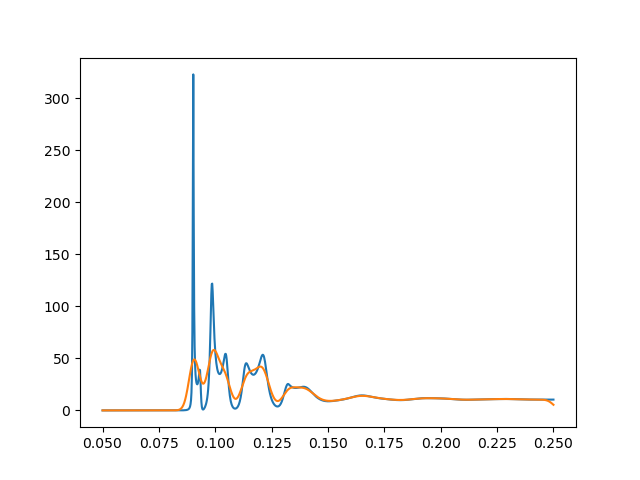

In [148]:
plt.close('all')
plt.plot(EE_DA.aoi.data, intens)
plt.plot(EE_DA.aoi.interp(coords={'aoi':np.linspace(angles[0],angles[-1],intens_diverged.size)}).data, intens_diverged)
plt.show

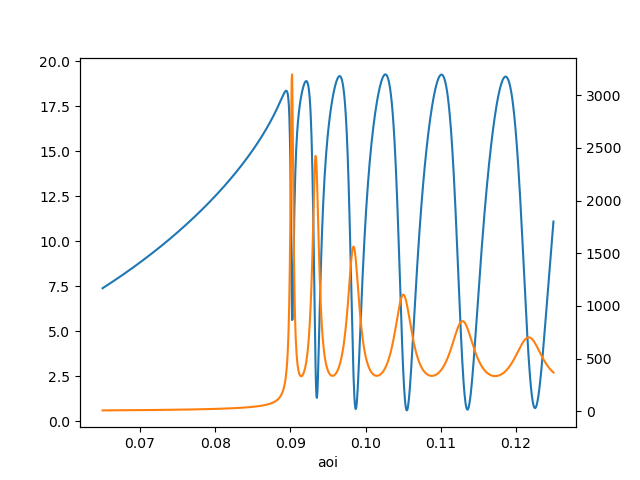

In [13]:
EE_DA = xr.DataArray(data=EE_mag**2,
                     dims=['depth', 'aoi'],
                     coords = {'depth': z, 'aoi': angles})

plt.close('all')
fig, ax1 = plt.subplots()
# EE_DA.sel(depth=slice(0,10)).plot.imshow(origin='upper')
EE_DA.sel(depth=slice(0,5)).integrate('depth').plot(ax=ax1, yscale='linear')
ax2 = ax1.twinx()
(EE_DA.sel(depth=slice(5,None)).integrate('depth')*1).plot(ax=ax2, color='C1', yscale='linear')
# (EE_DA.sel(depth=slice(5,None)).mean('depth')).plot(ax=ax2, color='C1', ylim=(-800,800))

# EE_DA.sel(depth=slice(0,10))

plt.show()

In [ ]:
EE_DA = xr.DataArray(data=EE_mag**2,
                     dims=['depth', 'aoi'],
                     coords = {'depth': z, 'aoi': angles})

plt.close('all')
fig, ax1 = plt.subplots()
# EE_DA.sel(depth=slice(0,10)).plot.imshow(origin='upper')
EE_DA.sel(aoi=slice(0.079,0.081)).mean('aoi').plot(ax=ax1, yscale='linear')
EE_DA.sel(aoi=slice(0.089,0.091)).mean('aoi').plot(ax=ax1, yscale='linear')
EE_DA.sel(aoi=slice(0.109,0.111)).mean('aoi').plot(ax=ax1, yscale='linear')

# EE_DA.sel(depth=slice(0,10))

plt.show()